<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Descomposición en Valores Singulares. Fundamentos Teóricos.

Este *cuaderno* trata sobre la descomposición en valores singulares como otra forma para reducir dimensión. El objetivo del *cuaderno* es que aprenda que son los componentes principales, que sea capaz de reconocer las características y el funcionamiento de la descomposición en valores singulares, y a construir e implementar este método.

**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

En el cuaderno *Fundamentos Teóricos* de la lección sobre PCA se definió la solución del problema de encontrar un índice $f=X \delta'$ que maximice la información contenida en $X$ y que sea de una dimensión menor, a partir de los eigenvalores y los eigenvectores de la matriz de covarianza. 

La descomposición de valores singulares, o SVD por sus siglas en inglés, ofrece otra forma de obtener esta solución.  Esta descomposición generaliza la noción de eigenvectores de matrices cuadradas a cualquier tipo de matriz. 


## Definición de SVD

En particular, la SVD plantea qeu cualquier matriz real $X$ de dimensión $n\times k$ puede factorizarse en tres matrices:

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times n}{\underbrace{U}}\underset{n\times k}{\underbrace{S}}\underset{k\times k}{\underbrace{V'}}
\end{align}

donde:

1. $U$ es una matriz $n\times n$ cuyas columnas son ortogonales $(U'U=I_{n})$, y donde las columnas de $U$ son los vectores singulares de la izquierda
2. $V$ es una matriz $k\times k$ cuyas filas y columnas son  ortogonales $(V'V=VV'=I_{k})$, y las columnas de V son los vectores singulares de la derecha.
3. $S$ es una matriz $n\times k$ que contiene los $r=min(n,k)$ valores singulares $(\sigma_{i}\geq0)$ en la diagonal principal, y 0 en el resto de la matriz. 

La SVD proporciona una forma de "descomponer" una matriz en componentes más simples que revelan ciertas propiedades de la matriz. La figura ilustra la descomposición:

![](figs/svd_a.png)

Dado que hay como máximo $k$ valores singulares (asumiendo $n > k$), las últimas columnas $n-k$ de U son irrelevantes, ya que se multiplicarán por 0. 

La Descomposición en Valores Singulares (SVD) de tamaño económico, también conocida como SVD delgada, es una versión de la SVD que elimina las columnas y filas redundantes de las matrices U, S y V^T. Denotamos esta descomposición con $\hat{U}\hat{S} \hat{V}'$: 

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times k}{\underbrace{\hat{U}}}\underset{k\times k}{\underbrace{\hat{S}}}\underset{k\times k}{\underbrace{\hat{V}'}}
\end{align}

La SVD delgada entonces, elimina estas columnas y filas redundantes. En la SVD delgada, U es una matriz m x k, S es una matriz k x k (es decir, es una matriz cuadrada con k filas y columnas), y V^* es una matriz k x n, donde k es el rango de la matriz original M (es decir, el número de valores singulares no nulos).

La SVD delgada es más eficiente en términos de almacenamiento y cálculo que la SVD completa, ya que solo necesita almacenar y manipular las columnas y filas de $U$, $S$ y $V'$ que son necesarias para reconstruir $X$. Esto puede ser especialmente útil cuando se trabaja con matrices grandes.


#### SVD y el rango de una matriz

El rango de una matriz es el número máximo de columnas linealmente independientes en la matriz. En el contexto de la Descomposición en Valores Singulares (SVD), el rango de la matriz está directamente relacionado con los valores singulares de la matriz.

Los valores singulares de una matriz son los valores en la diagonal de la matriz S en la descomposición SVD. Estos valores son siempre no negativos y se ordenan en orden descendente. El rango de la matriz es igual al número de valores singulares no nulos.

Por lo tanto, los valores singulares proporcionan una forma de determinar el rango de la matriz: simplemente contamos el número de valores singulares que no son cero. Esto también significa que la matriz es de rango completo si y solo si ninguno de sus valores singulares es cero.

Además, el valor singular más grande de una matriz (a menudo llamado el valor singular principal) da una medida de la "magnitud" de la matriz, mientras que el rango de la matriz da una medida de la "dimensión" de la matriz. Por lo tanto, los valores singulares pueden proporcionar información valiosa sobre la estructura y las propiedades de la matriz.



### Ejemplo cálculo SVD

Ilustremos el cálculo de la descomposición en `Python` utilizando datos de la [Encuesta Nacional de Presupuestos de los Hogares (ENPH) de Colombia](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/encuesta-nacional-de-presupuestos-de-los-hogares-enph), realizada por el DANE en 2017. El archivo `gasto_col_2017_norm.csv` disponible en la carpeta `data`, contiene los gastos individuales promedios estandarizados en Salud, Transporte, y Educación para 38 ciudades colombianas.

In [1]:
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np


# Cargamos y visualizamos la primeras observaciones de los datos
gasto = pd.read_csv('data/gasto_col_2017_norm.csv')
gasto = gasto.set_index("Ciudad")
gasto.head()

,Salud,Transporte,Educación
Ciudad,,,
Arauca,-0.125062,-1.344088,-1.028321
Armenia,0.434314,0.691669,0.528711
Barrancabermeja,-0.752697,-0.093582,0.966586
Barranquilla,-0.859420,0.275332,0.503810
Bogotá,2.745217,2.313395,3.943969


Con los datos cargados, calcularemos la descomposición en valores singulares usando la función `svd` en [SciPy](https://scipy.org/). Esta función pertenece al módulo `scipy.linalg` y realiza la Descomposición en Valores Singulares (SVD) de una matriz dada. La función toma como argumento la matriz que se quiere factorizar y retorna tres matrices U, S y V'. Por defecto la función retorna las matrices completas, pero si establece el parámetro `full_matrices=False` retorna la SVD delgada. Se puede omitir el cálculo de las matrices U y V' fijando `compute_uv=False`.

In [2]:
# Cargamos la función
from scipy.linalg import svd

# Implementamos la función a la matriz de gastos
U, S, VT = svd(gasto)

Obtenemos asi la matriz S con los valores singulares que va a ser de nuestro interés:

In [3]:
S

array([9.12650026, 4.13334567, 3.2592095 ])

Notando que tiene $k=3$ valores singulares.

## SVD y su conexión  con PCA

Existe una relación muy estrecha entre SVD y componentes principales. Es más, SVD es una forma en la que se pueden encontrar los componentes principales. Para entender esta conexión  es necesario primero estudiar la relación que existe entre valores singulares y eigenvalues. Una vez establecida esta relación es fácil ver porque SVD puede utilizarse para encontrar componentes principales.

### Relación entre valores singulares y eigenvalues

En esa sección examinaremos la relación que existe entre los valores singulares y los  eigenvalues. Para una matriz real $X$ arbitraria, si 

\begin{align}
X = USV'
\end{align}

entonces para 

\begin{align}
X'X &= VS'U'USV' \\
    &= V(S'S)V' \\
    &= VDV' \\
\end{align}

Donde la segunda línea ($V(S'S)V'$) surge de la ortogonalidad de $U$, y $D=S^2$ es una matriz diagonal que contiene los cuadrados de los valores singulares. Entonces, post multiplicando ambos lados por $V$ y usando su ortogonalidad:

\begin{align}
(X'X)V = VD
\end{align}

Por lo tanto, los eigenvectores de $X'X$ son iguales a $V$, que es el vector singular derecho de X, y los eigenvalores de $X'X$ son iguales a $D$. Similarmente,


\begin{align}
XX' &= USV'VS'U' \\
    &= U(S'S)U' \\
    &= UDU' \\
\end{align}

y 

\begin{align}
(X'X)U = UD
\end{align}

por lo que los eigenvectores de $XX'$ son iguales a $U$, que es el vector singular izquierdo de X, y los eigenvalores de $X'X$ son iguales a $D$. Resumiendo, tenemos que:

\begin{align}
U =eigenvectores(XX')
\end{align}

\begin{align}
V =eigenvectores(X'X)
\end{align}

\begin{align}
D=S^2 =eigenvalores(X'X)=eigenvalores(XX')
\end{align}


Puesto que los eigenvalores no se ven afectados cuando transformamos linealmente una matriz, tenemos que los vectores singulares derechos de $X$ son iguales a los vectores propios de la covarianza $S$. Además, los eigenvalores de $S$ son el cuadrado de los valores singulares.


Además, el rango de la matriz $X$  es igual al número de valores singulares no nulos, que es también igual al número de valores propios no nulos de $X'X$ o $XX'$. Por lo tanto, tanto los valores propios como los valores singulares pueden proporcionar información sobre el rango de la matriz.

#### SVD y eigenvalues en `Python` 

Podemos utilizar el  ejemplo anterior para ilustrar esta relación en `Python`. La matriz $X'X$ es:

In [4]:
XtX=gasto.T.dot(gasto)
XtX.head()

,Salud,Transporte,Educación
Salud,37.000000,25.443502,23.851671
Transporte,25.443502,37.000000,20.036157
Educación,23.851671,20.036157,37.000000


los eigenvalues al cuadrado son:


In [5]:
eig_val, eig_vec = np.linalg.eig(XtX)
eig_val

array([83.29300699, 10.62244659, 17.08454641])

mientras que los valores singulares:

In [6]:
S

array([9.12650026, 4.13334567, 3.2592095 ])

Sacando la raíz cuadrada a los eigenvalues, vemos que coinciden los los valores singulares:

In [7]:
np.sqrt(eig_val)

array([9.12650026, 3.2592095 , 4.13334567])

### SVD para el cálculo de PCA

La relación que existen entre los valores singulares y los eigenvalues mostrada en el apartado anterior sugiere entonces que SVD puede usarse para encontrar los componentes principales. De hecho, la SVD es lo que utilizan muchos softwares por defecto para su cálculo. 

Esto sucede porque para efectuar el cálculo de los componentes principales necesitamos primero obtener la matriz de covarianzas, que es el producto $X'X$, puesto que la descomposición espectral solo puede efectuarse sobre matrices cuadradas. Sin embargo, el cálculo del producto $X'X$ puede generar significativas pérdidas de precisión numérica. (Un ejemplo conocido es el de la matriz de [Läuchli](https://link.springer.com/article/10.1007%2FBF01386022)  que esta más allá del alcance del curso, pero te invito a investigar más sobre el tema.)

SVD por el contrario puede aplicarse sobre cualquier matriz real, no solo cuadrada, y existen muchos algoritmos que lo hacen eficientemente y sin pérdidas de precisión numéricas. 

## SVD y reducción de dimensión

Dada la conexión directa entre los valores singulares y los eigenvalues, podemos entonces obtener los componentes principales por SVD y proceder de la misma forma que hicimos en los cuadernos anteriores para reducir la dimensión.

Sin embargo, existe una conexión mas profunda entre SVD y PCA. Partiendo de la ecuación:


\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times n}{\underbrace{U}}\underset{n\times k}{\underbrace{S}}\underset{k\times k}{\underbrace{V'}}
\end{align}



podemos descomponer $X$ como la suma de matrices de rango uno:

\begin{align}
X= \sum_{i=1}^k \sigma_i u_iv_i'
\end{align}

donde $\sigma_i$ son los valores singulares, $u_i$ son los vectores singulares izquierdos, y $v_i$ son los vectores singulares derechos.

Si estos valores singulares desaparecen rápidamente uno puede producir una aproximación de rango $l << k$ de forma que: 

\begin{align}
\underset{n\times k}{\underbrace{X}}\approx\underset{n\times l}{\underbrace{U}}\underset{l\times l}{\underbrace{S}}\underset{l\times n}{\underbrace{V'}}
\end{align}

Esta se conoce  como **SVD truncado**. Usando esta aproximación tenemos entonces que podemos representar una matriz $n\times k$ en una menor dimensión. Claramente, esta  ya no es una descomposición exacta de la matriz original $X$, sin embargo, es muy útil porque es la aproximación más cercana a $X$ que se puede lograr mediante una matriz de rango $l$.

En efecto, el **SVD truncado**  minimiza el error de aproximación medido por la norma de Frobenius, lo que equivale a minimizar el error cuadrático. Es decir, la SVD truncada minimiza la distancia al cuadrado entre cada punto de datos y su reconstrucción a partir de la representación de baja dimensión. 

### Ejemplo en `Python`


Ilustremos el uso de **SVD truncado** para reducir dimension de una imagen. Las imágenes usualmente son objetos de alta dimensión que podemos comprimir, reducir su dimensión, utilizando esta técnica.  En este ejemplo nos centraremos en imágenes en blanco y negro. 

Una imagen en blanco y negro se puede representar como una matriz donde cada elemento de la matriz corresponde a un píxel de la imagen. Los elementos de la matriz entonces, indican la intensidad de la luz en ese punto. Los valores suelen estar en una escala de 0 a 255, donde 0 representa el negro puro (sin luz) y 255 representa el blanco puro (luz completa). Los valores intermedios representan diferentes tonos de gris.

Por lo tanto, una imagen en blanco y negro de tamaño $m\times n$ se puede representar como una matriz de tamaño $m\times n$. Cada elemento de la matriz $(i, j)$ corresponde al píxel en la posición $(i, j)$ de la imagen. El valor de este elemento es la intensidad de la luz en ese píxel.


En este ejemplo usaremos la foto del físico [Albert Einstein](https://es.wikipedia.org/wiki/Albert_Einstein) que aparece en [wikipedia](https://es.wikipedia.org/wiki/Albert_Einstein) y buscaremos aproximarla a partir de una menor dimensión.

Comenzamos cargando la imagen usando la función `imread`. Esta es una función que pertenece al módulo de `Matplotlib`, específicamente al submódulo `image`. Esta función se utiliza para leer imágenes en formato de archivo y cargarlas como arreglos `NumPy`. La ventaja de esta función es que carga imágenes desde archivos locales y, una vez cargadas, se convierten en matrices `NumPy` que se pueden manipular y analizar fácilmente en `Python`.

In [8]:
# Cargamos las librerías
import numpy as np
import matplotlib.pyplot as plt

# Cargamos la foto
einstein = plt.imread("data/einstein.jpeg")

# Verificamos que es un array
type(einstein)

numpy.ndarray

En la primer fila vemos que cada entrada contiene un número que indica la intensidad de la luz en ese punto:

In [9]:
einstein[0,:]

array([63, 61, 59, ..., 23, 25, 27], dtype=uint8)

Cargada la imagen y verificado que es un array, verificamos la dimensión:

In [10]:
n,k= einstein.shape
print("Dimensión:", n, "x", k)

Dimensión: 2048 x 1536


y la podemos graficar con `plt.imshow` de Matplotlib puede usarse para graficar imágenes

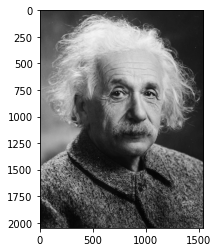

In [11]:
# Vemos la imagen
plt.imshow(einstein, cmap='gray')
plt.show()

El objetivo es entonces reducir la dimensión de esta matriz, de forma tal que retenga la suficiente información que nos permita aproximarnos a la imagen original. 

Descomponemos entonces la figura con la función `svd`:

In [12]:
U,S,Vt = svd(einstein)

Dado que esta función retorna los valores singulares en un array la pondremos en una matriz diagonal. Sin embargo solamente retendremos los primeros l=3 valores singulares

In [13]:
l= 3 # valores singulares retenidos

S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal

S2.shape #tenemos una matriz de dimensión 3 x 3

(3, 3)

Veamos que tan bien se reconstruye la matriz con estos 3 valores singulares. Para reconstruirla tenemos que resolver la siguiente operación: 

\begin{align}
\underset{n\times l}{\underbrace{U}}\underset{l\times l}{\underbrace{S}}\underset{l\times n}{\underbrace{V'}}
\end{align}

Para simplificar la tarea subsiguiente pondremos esta operación en una función que llamaremos `svd_truncada`, que tendrá como parámetro el número de valores singulares (l) a retener y los datos originales:

In [14]:
def svd_truncada(l, X):
    """
     Esta función retorna la aproximación a la matriz original a partir de la SVD truncada

    Parameters:
        l (int):  número de valores singulares a utilizar en la reconstrucción
        X (array): matriz original a descomponer

    Returns:
        resultado (array): reconstrucción de X con l componentes principales
    """
    # SVD 
    U,S,Vt = svd(einstein)

    
    S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal
    
    # SVD truncada
    return(np.dot(U[:,0:l],np.dot(S2,Vt[0:l,:])))
    

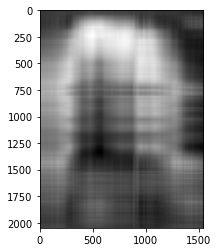

In [15]:
# Usando 3 valores singulares
plt.imshow(svd_truncada(3,einstein),cmap='gray')
plt.show()

Con 3 valores singulares al figura es muy borrosa, pero con 10 la figura comienza a delinearse:

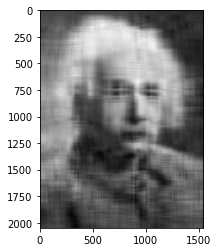

In [16]:
# Usando 10 valores singulares
plt.imshow(svd_truncada(10,einstein),cmap='gray')
plt.show()

La pregunta es entonces cuantos valores singulares necesitamos. Si los graficamos, vemos que rápidamente el valor cae a 0.

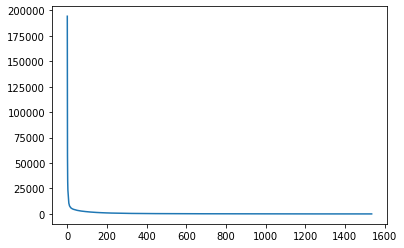

In [17]:
x_coordinate = [i for i in range(len(S)) ]
plt.plot(x_coordinate,S) 
plt.show()

Calculemos la proporción de varianza explicada: 

In [18]:
var_explained = np.round(S**2/np.sum(S**2), decimals=6)
sum(var_explained[0:60])

0.9869180232781218

Con 60 valores singulares explicamos más del 98% de la varianza.

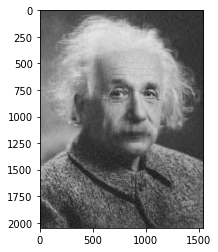

In [19]:
# Usando 60 valores singulares
plt.imshow(svd_truncada(60,einstein),cmap='gray')
plt.show()

De hecho, con 60 valores singulares la figura se distingue claramente.  En efecto pudimos reducir aproximadamente la imagen original en un 96%. Esto principalmente se debe a que los pixeles adyacentes están fuertemente correlacionados entre si y la SVD truncada nos permite quizás encontrar combinación de estos que nos permite reducir el espacio en el cual viven nuestros datos.

# Referencias


-   DANE (29 de Septiembre de 2020). Encuesta nacional de presupuestos
    de los hogares (ENPH). Anexos: 32 ciudades y 6 ciudades intermedias.
    <https://www.dane.gov.co/files/investigaciones/boletines/enph/ciudades-enph-2017.xls>

-   Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). Mathematics
    for machine learning. Cambridge University Press.

-   Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.

-   Hastie, T., Tibshirani, R., & Friedman, J. H. (2009). The elements of statistical learning: data mining, inference, and prediction. 2nd ed. New York: Springer.

-   Murphy, K. P. (2012). Machine learning: a probabilistic perspective.
    MIT press.

-   Peña, D. (2002). Análisis de datos multivariantes (Vol. 24). Madrid:
    McGraw-hill.



# Información de Sesión

In [20]:
import session_info

session_info.show(html=False)

-----
matplotlib          3.5.3
numpy               1.18.4
pandas              1.0.3
scipy               1.4.1
session_info        1.0.0
-----
IPython             7.14.0
jupyter_client      6.1.3
jupyter_core        4.6.3
jupyterlab          2.1.1
notebook            6.0.3
-----
Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
Linux-5.15.0-1017-aws-x86_64-with-debian-buster-sid
-----
Session information updated at 2023-08-06 02:26
